In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets("MNIST_Data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_Data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_Data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_Data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_Data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
#Neurral network training parameters
#28*28=784

batch_size=128
# keep_prob= .5
learning_rate=2e-4
display_step=20
num_steps=80000

# image_size=28
# num_labels=10
img_dim=784 #not 28*28,but is 784(a straight line vector)
disc_dim=256
noise_dim=100
gen_dim=256

In [4]:
#Tensorflow data inputs
gen_inp = tf.placeholder(tf.float32,shape=[None,noise_dim])#the number row is the number of observations(batch size)
disc_inp=tf.placeholder(tf.float32,shape=[None,img_dim])

In [5]:
def weight_init(shape):
    return tf.random_normal(shape=shape,stddev=1. / tf.sqrt(shape[0] / 2.))

In [6]:
# model  Architecture weights
# noise dimension multiply some weight matriices and add biases and get some 2-dimension matrix
# and multiply weight matrix and add some biases and then sigmoid

w={
    "w1":tf.Variable(weight_init([noise_dim,gen_dim])), 
    "w2":tf.Variable(weight_init([gen_dim,img_dim])),
    "w3":tf.Variable(weight_init([img_dim,disc_dim])),
    "w4":tf.Variable(weight_init([disc_dim,1]))
}
b={
    "b1":tf.Variable(tf.zeros([gen_dim])),
    "b2":tf.Variable(tf.zeros([img_dim])),
    "b3":tf.Variable(tf.zeros([disc_dim])),
    "b4":tf.Variable(tf.zeros([1]))
}


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#Model_architechture

#Generator

def gen_fun(x):
    h1=tf.matmul(x,w["w1"])
    h1=tf.add(h1,b["b1"])
    h1=tf.nn.relu(h1)
    
    h1=tf.matmul(h1,w["w2"])
    h1=tf.add(h1,b["b2"])
    h1=tf.nn.sigmoid(h1)
    
    return h1

#Discriminator

def disc_fun(x):
    h2=tf.matmul(x,w["w3"])
    h2=tf.add(h2,b["b3"])
    h2=tf.nn.relu(h2)
    
    h2=tf.matmul(h2,w["w4"])
    h2=tf.add(h2,b["b4"])
    h2=tf.nn.sigmoid(h2)
    
    return h2

In [8]:
# Cost function Optimization & Model Evaluation

gen_out=gen_fun(gen_inp)

disc_real_out=disc_fun(disc_inp)
disc_fake_out=disc_fun(gen_out)

#AdomOptimizer is similar to the stochastic gradient descent
optim_gen=tf.train.AdamOptimizer(learning_rate=learning_rate)
optmi_disc=tf.train.AdamOptimizer(learning_rate=learning_rate)

# optimize the cost function, reduce the average of the output
cost_gen=-tf.reduce_mean(tf.log(disc_fake_out))
# when the disc_real_out ->1, and disc_fake_out ->0, the cost ->0
cost_disc=-tf.reduce_mean(tf.log(disc_real_out)+tf.log(1.-disc_fake_out))

# Generator and Discriminator Variables
vars_gen=[w["w1"],w["w2"],b["b1"],b["b2"]]
vars_disc=[w["w3"],w["w4"],b["b3"],b["b4"]]

training_gen=optim_gen.minimize(cost_gen, var_list=vars_gen)
training_disc=optim_gen.minimize(cost_disc, var_list=vars_disc)

# Initialize the variables(i.e assign their default value)


In [9]:
init =tf.global_variables_initializer()

### Starting the model training session


In [10]:
# cross_entropy = -tf.reduce_sum(gen_inp*tf.log(y_conv))
# train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Step 1: Generator Loss: 1.174713, Discriminator Loss: 1.145784
Step 2000: Generator Loss: 5.084534, Discriminator Loss: 0.019912
Step 4000: Generator Loss: 4.039534, Discriminator Loss: 0.063871
Step 6000: Generator Loss: 4.140039, Discriminator Loss: 0.143743
Step 8000: Generator Loss: 4.645658, Discriminator Loss: 0.070311
Step 10000: Generator Loss: 4.126902, Discriminator Loss: 0.150643
Step 12000: Generator Loss: 4.166895, Discriminator Loss: 0.251455
Step 14000: Generator Loss: 4.333557, Discriminator Loss: 0.127097
Step 16000: Generator Loss: 4.250654, Discriminator Loss: 0.166644
Step 18000: Generator Loss: 3.869440, Discriminator Loss: 0.205827
Step 20000: Generator Loss: 3.800434, Discriminator Loss: 0.289734
Step 22000: Generator Loss: 4.157008, Discriminator Loss: 0.189885
Step 24000: Generator Loss: 3.889543, Discriminator Loss: 0.218796
Step 26000: Generator Loss: 4.074484, Discriminator Loss: 0.412890
Step 28000: Generator Loss: 3.008605, Discriminator Loss: 0.339312
Ste

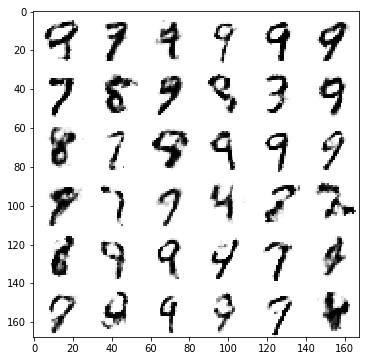

In [13]:
with tf.Session() as sess:
    
    # run the initializer
    sess.run(init)
    # Give the batches to the session
    for step in range(1,num_steps+1):
        batch_x, _I=mnist.train.next_batch(batch_size)
        
        # Generate noise to feed to the generator
        # range(-1.,1.) is Gaussian which is random uniform distribution
        noise_temp=np.random.uniform(-1.,1.,size=[batch_size,noise_dim])
        
        #Run optimization op(backprop)
        feed_dict={disc_inp:batch_x, gen_inp: noise_temp}
        _,_,gl,dl=sess.run([training_gen, training_disc, cost_gen, cost_disc],
                          feed_dict=feed_dict)
        
#         if gl is "nan":
#             print(disc_fake_out)
        if step % 2000 == 0 or step == 1:
#             train_accuracy = accuracy.eval(feed_dict={
#                 x:batch[0], y_: batch[1], keep_prob: 1.0})
#             print("Step %i: Generator Loss: %f, Discriminator Loss: %f, training accuracy %g" % (step,gl,dl,train_accuracy))
            print("Step %i: Generator Loss: %f, Discriminator Loss: %f" % (step,gl,dl))
             
    print("Finished!")
    
    # Testing
    # Generating the images using generator network
    n=6
    canvas = np.empty((28 * n, 28 * n))
    
    for i in range(n):
        # Noise input
        z=np.random.uniform(-1., 1., size=[n, noise_dim])
        # Generate image from noise
        g = sess.run(gen_out, feed_dict = {gen_inp:z})
        # Reverse colors for better display
        g = -1 * (g - 1)
        for j in range(n):
            # Draw the generated digits
            canvas[i * 28: (i+1)*28, j*28:(j+1)*28]=g[j].reshape([28,28])
    plt.figure(figsize=(n,n))
    plt.imshow(canvas, origin="upper", cmap="gray")
    plt.show


In [14]:
# correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# print sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

### See the accuracy and the cost function for generator and the discriminator